# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

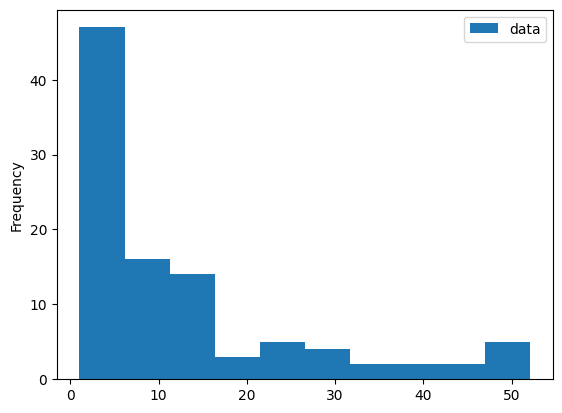

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

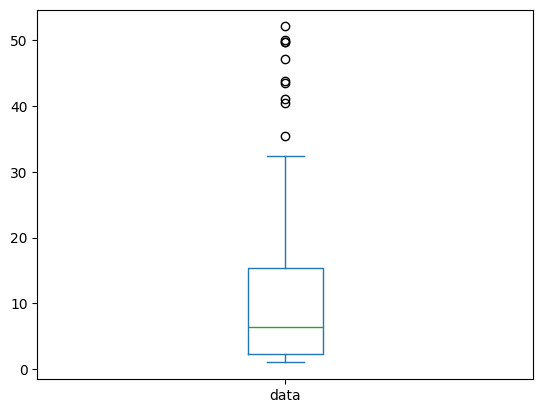

In [4]:
df.plot.box()

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

(3312, 19)
Index(['Order Date', 'Row ID', 'Order ID', 'Ship Mode', 'Customer ID',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='str')
MEANS
Row ID          5087.107488
Postal Code    56186.515097
Sales            221.381418
Quantity           3.766908
Discount           0.156467
Profit            28.212340
dtype: float64
MEDIANS
Row ID          5183.5000
Postal Code    60472.5000
Sales             53.8100
Quantity           3.0000
Discount           0.2000
Profit             8.2968
dtype: float64
MODES
Row ID            13.00
Postal Code    10035.00
Sales             12.96
Quantity           2.00
Discount           0.00
Profit             0.00
Name: 0, dtype: float64


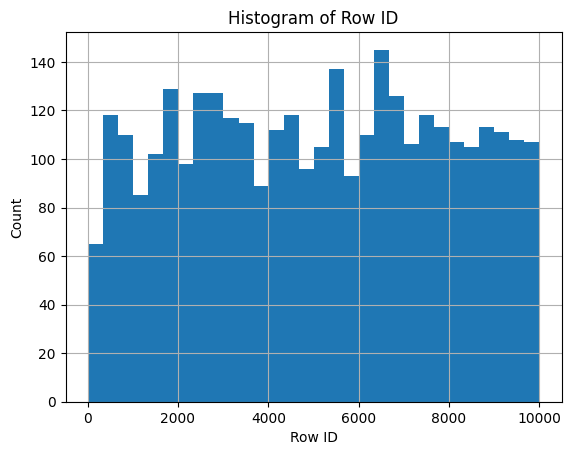

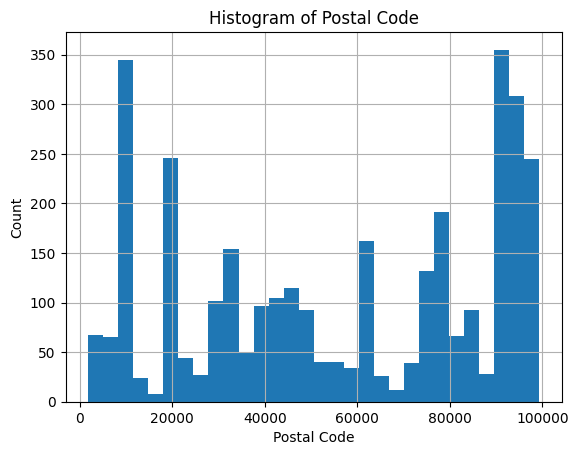

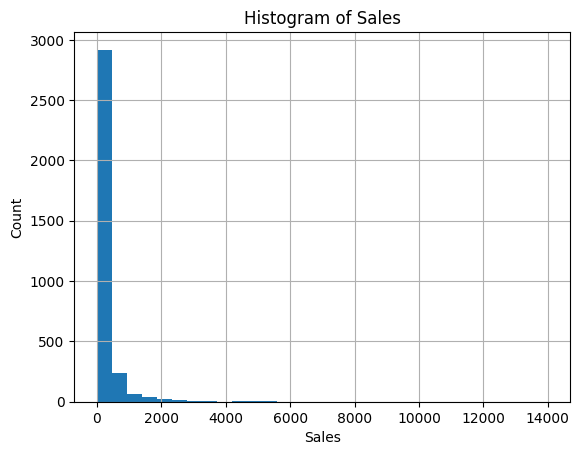

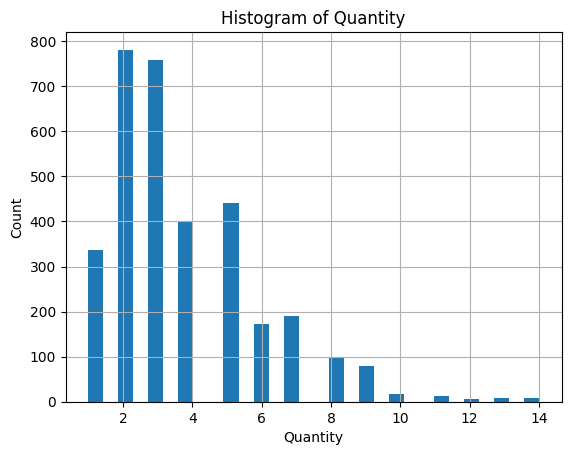

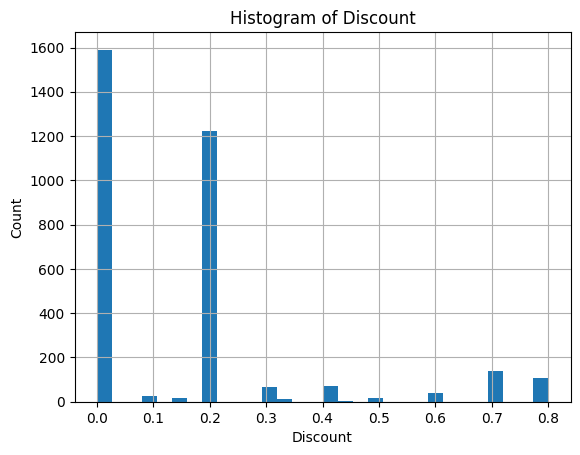

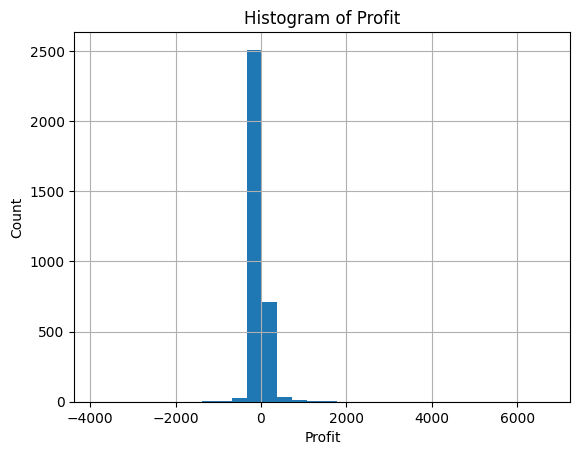

/tmp/ipykernel_48384/4191599391.py:47: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  cat_cols = df.select_dtypes(include='object').columns


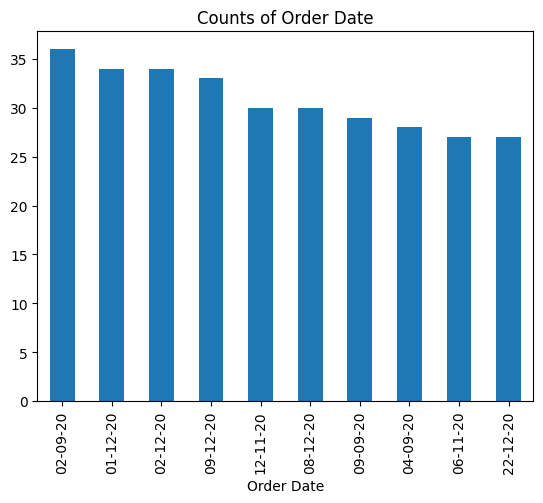

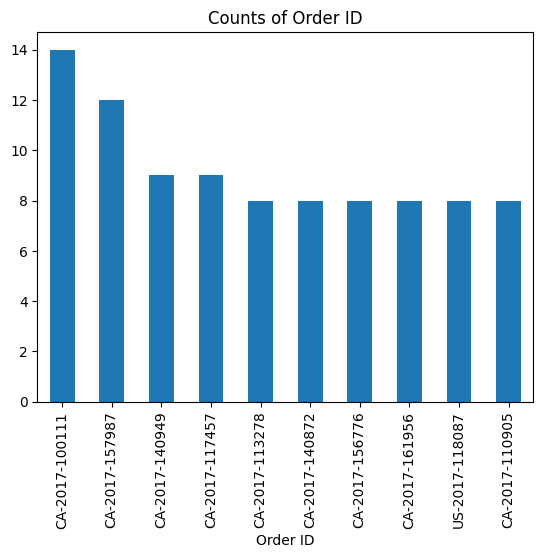

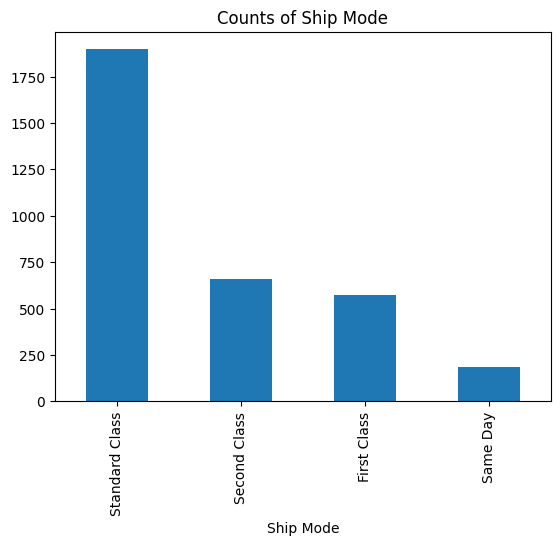

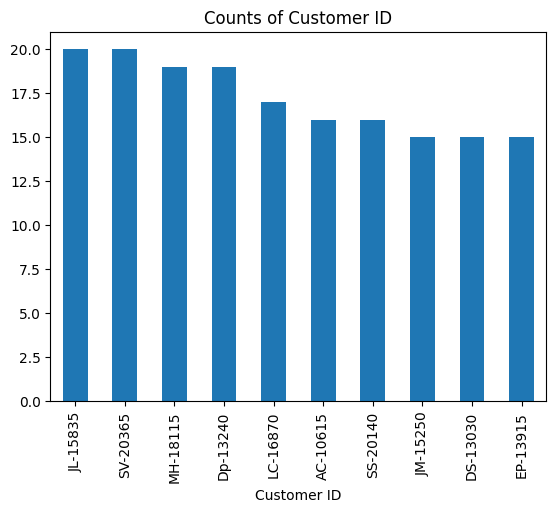

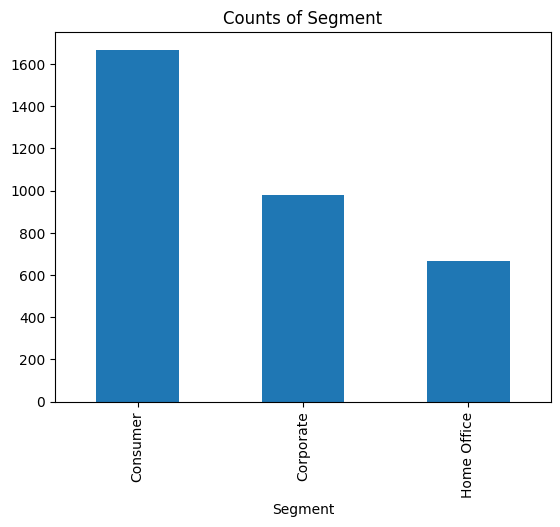

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# LOAD DATA

df = pd.read_csv("US  E-commerce records 2020.csv", encoding="cp1252")



# BASIC INFO
print(df.shape)
print(df.columns)

# =====================
# NUMERIC ANALYSIS
# =====================

print("MEANS")
print(df.mean(numeric_only=True))

print("MEDIANS")
print(df.median(numeric_only=True))

print("MODES")
print(df.mode(numeric_only=True).iloc[0])


# =====================
# HISTOGRAMS
# =====================

num_cols = df.select_dtypes(include='number').columns

for col in num_cols:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()


# =====================
# BAR PLOTS FOR CATEGORIES
# =====================

cat_cols = df.select_dtypes(include='object').columns

for col in cat_cols[:5]:
    plt.figure()
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(f"Counts of {col}")
    plt.show()


# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

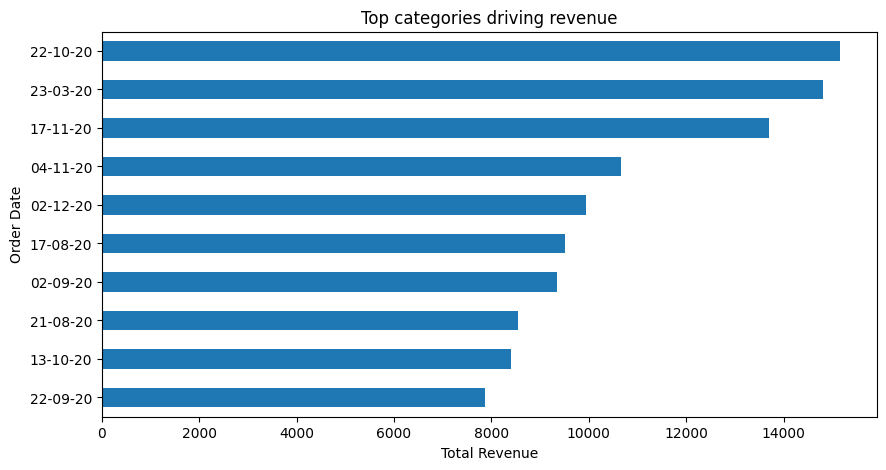

In [6]:
# Example storytelling chart

sales_col = [c for c in df.columns if 'sales' in c.lower() or 'revenue' in c.lower()]

if sales_col:
    sales = sales_col[0]

    top = df.groupby(df.columns[0])[sales].sum().sort_values().tail(10)

    plt.figure(figsize=(10,5))
    top.plot(kind='barh')

    plt.title("Top categories driving revenue")
    plt.xlabel("Total Revenue")
    plt.show()


The E-commerce dataset reveals that most transactions fall within lower to mid-range values, while a small number of high-value orders contribute disproportionately to total revenue. This suggests the business relies heavily on a minority of large purchases. The distribution is right-skewed, with several outliers representing premium or bulk transactions. From a business perspective, targeting customers who make these larger purchases could significantly increase overall revenue.